In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.special import binom

In [66]:
inf = 35000 # number of infected. tested or real (estimated)?
pop = 80e6 # population
ind = inf/pop  # prob. that individual is infected
r = 0.5

def one_in_group(ind, N):
    """Probability that at least 1 in group of N is infected"""
    return N*ind

def m_in_group(ind, N, m):
    """Probability that exactly m in group of N are infected"""
    return (binom(N,m) * ind**m * (1-ind)**(N-m))

def trans_group_wrong(ind, N, r):
    """Probability that at least 1 transmission occurs in group of size N, 
    transmission rate r probability of transmission,
    all group members have same contact with every group member (well mixed)"""
    return (1/6 * r * ind * N*(N*N - 1)) # wrong, forgot to weigh series elements

def trans_group_m(ind, N, r, m):
    """Probability of at least one transmission in group of N when m infected"""
    return (m_in_group(ind, N, m)*m*(N-m)*r*ind)
    
def trans_group(ind, N, r):
    """Probability that at least 1 transmission occurs in group of size N, 
    transmission rate r probability of transmission,
    all group members have same contact with every group member (well mixed)"""
    out = 0
    for m in range(1,N):
        out += trans_group_m(ind, N, r, m)
    return out



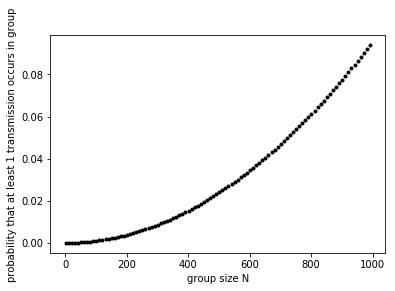

In [67]:
Nrange = np.arange(1,1000)
for Ni in Nrange[::10]:
    plt.plot(Ni, trans_group(ind, Ni, 0.5), 'k.')
plt.xlabel('group size N')
plt.ylabel('probability that at least 1 transmission occurs in group')
plt.show()

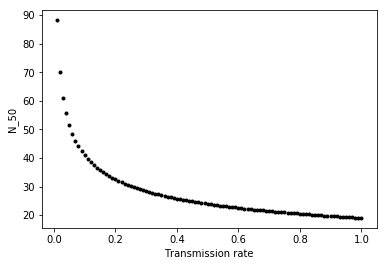

In [62]:
def r_screen(r):
    """How large does a group have to be for 50% probability of 1 or more transmission,
    depending on transmission rate r"""
    solvefunc = lambda N : trans_group_wrong(ind, N,  r) - 0.5
    return float(np.squeeze(fsolve(solvefunc, 30)))

rRange = np.linspace(0.01, 1, 100)
for ri in rRange:
    plt.plot(ri, r_screen(ri), 'k.')
plt.xlabel('Transmission rate')
plt.ylabel('N_50')
plt.show()

## Needs to be double checked, not sure if correct!